#Titanic Analysis

In [1]:
from __future__ import print_function

import IPython
print('IPython:', IPython.__version__)

import numpy as np
print('numpy:', np.__version__)

import scipy as sp
print('scipy:', sp.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import matplotlib.pyplot as plt

import sklearn
print('scikit-learn:', sklearn.__version__)

import seaborn
print('seaborn', seaborn.__version__)

import pandas as pd
print('pandas', pd.__version__)

IPython: 3.1.0
numpy: 1.9.2
scipy: 0.15.1
matplotlib: 1.4.3
scikit-learn: 0.16.1
seaborn 0.5.1
pandas 0.16.0


In [2]:
seaborn.set()

In [3]:
%matplotlib inline

In [4]:
titanicTrainingDF = pd.read_csv('data/train.csv')
titanicTestingDF = pd.read_csv('data/test.csv')

In [5]:
print('shape of training DF', titanicTrainingDF.shape)
print('shape of testing DF', titanicTestingDF.shape)

shape of training DF (891, 12)
shape of testing DF (418, 11)


##Exploratory Analysis

In [6]:
titanicTrainingDF.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
#make a series holding the columns
titanicDataFeatures = titanicTrainingDF.columns
titanicDataFeatures.view()

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'], dtype='object')

###Get Some Summary Statistics

In [7]:
#Basic Statistic Values
titanicTrainingDF.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [8]:
#Missing Data Amount
titanicTrainingDF.isnull().sum() / len(titanicTrainingDF) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [12]:
#Kill off nan values
titanicTrainingDF = titanicTrainingDF.dropna()

In [13]:
print('titanic training data dimensions after killing off na values', titanicTrainingDF.shape)

titanic training data dimensions after killing off na values (183, 12)


###Explore Data Graphically

(-1, 3)

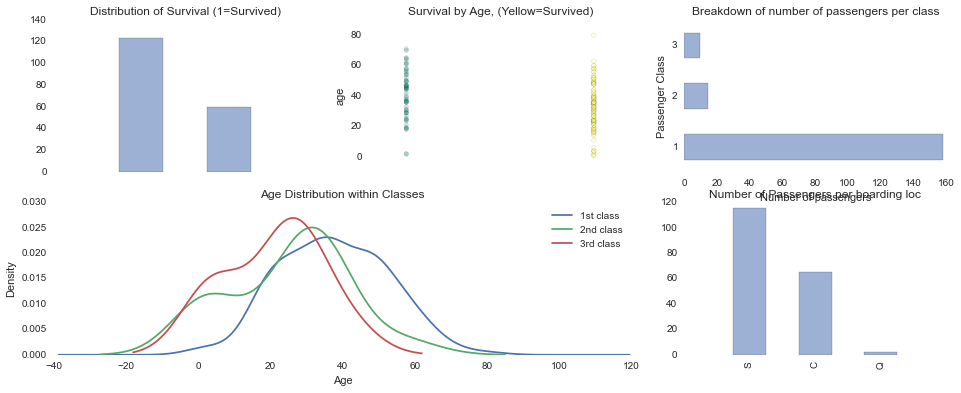

In [14]:
#Specify parameters of graphs
SurvivalFigure = plt.figure(figsize=(16,6), dpi=1600)
alpha_scatterplot = 0.2
alpha_barchart = 0.55

#Basic survival plot
ax1 = plt.subplot2grid((2,3), (0,0))
titanicTrainingDF.loc[ : , 'Survived'].value_counts().plot(kind='bar',alpha=alpha_barchart)
ax1.set_xlim(-1,2)
plt.title('Distribution of Survival (1=Survived)')

#Survival By Age
ax2 = plt.subplot2grid((2,3), (0,1))
plt.scatter(titanicTrainingDF.loc[:, 'Survived'],titanicTrainingDF.loc[:, 'Age'], c=titanicTrainingDF.loc[:, 'Survived'], cmap='summer', alpha=alpha_scatterplot )
plt.grid(b=True, which='major', axis='y')
plt.ylabel('age')
plt.title('Survival by Age, (Yellow=Survived)')

#Passenger Class Distribution
ax3 = plt.subplot2grid((2,3), (0,2))
titanicTrainingDF.loc[:, 'Pclass'].value_counts().plot(kind='barh', alpha=alpha_barchart)
plt.ylabel('Passenger Class')
plt.xlabel('Number of passengers')
plt.title('Breakdown of number of passengers per class')

#Kernel Density Estimate of Age Distribution within classes
ax4 = plt.subplot2grid((2,3), (1,0), colspan=2)
for classNum in range(3):
    titanicTrainingDF.loc[:, 'Age'][titanicTrainingDF.Pclass == classNum+1].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution within Classes')
plt.legend(('1st class', '2nd class', '3rd class'), loc='best')

#Passengers by boarding loc
ax5 = plt.subplot2grid((2,3), (1,2))
titanicTrainingDF.loc[: , 'Embarked'].value_counts().plot(kind='bar', alpha=alpha_barchart)
plt.title('Number of Passengers per boarding loc')
ax5.set_xlim(-1,len(titanicTrainingDF.Embarked.value_counts()))

###Explore Death/Survival Better

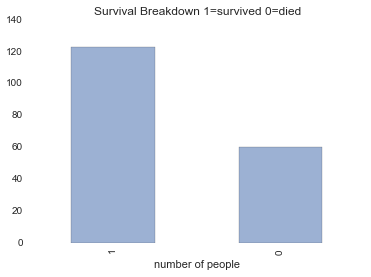

In [15]:
plt.figure(figsize=(16,6))
fig, ax = plt.subplots()
titanicTrainingDF.loc[:, 'Survived'].value_counts().plot(kind='bar', alpha=alpha_barchart)
plt.xlabel('number of people')
plt.title('Survival Breakdown 1=survived 0=died')

####Survival Breakdown by Gender

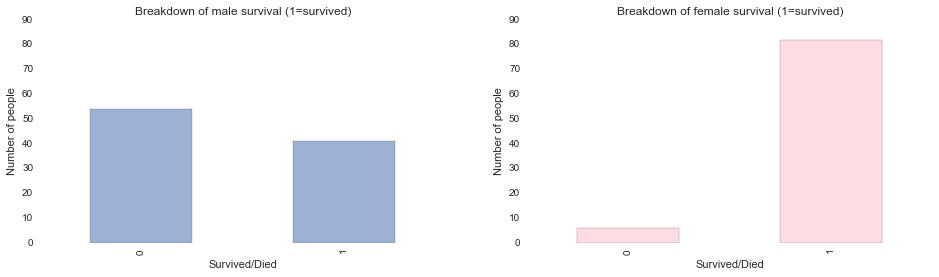

In [16]:
genderFigure = plt.figure(figsize=(16,4))

maleAxes = genderFigure.add_subplot(1,2,1)
maleMask = titanicTrainingDF.Sex == 'male'
maleSurvivalCounts = titanicTrainingDF.Survived[maleMask].value_counts()
maleSurvivalCounts.plot(kind='bar', alpha=alpha_barchart)
plt.xlabel('Survived/Died')
plt.ylabel('Number of people')
plt.title('Breakdown of male survival (1=survived)')

femaleAxes = genderFigure.add_subplot(1,2,2, sharey=maleAxes)
femaleMask = titanicTrainingDF.Sex == 'female'
femaleSurvivalCounts = titanicTrainingDF.Survived[femaleMask].value_counts()
femaleSurvivalCounts.sort(0) #so both display same x axis
femaleSurvivalCounts.plot(kind='bar', alpha=alpha_barchart, color='pink')
plt.xlabel('Survived/Died')
plt.ylabel('Number of people')
plt.title('Breakdown of female survival (1=survived)')

In [17]:
#Graph survival in terms of percentages
numberOfWomen = len(titanicTrainingDF[femaleMask])
numberOfMen = len(titanicTrainingDF[maleMask])

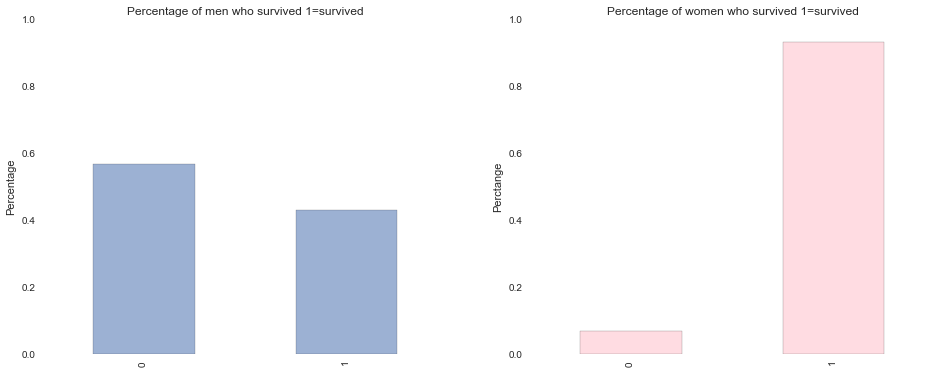

In [18]:
genderPercentagesFigure = plt.figure(figsize=(16,6))

maleAxes = genderPercentagesFigure.add_subplot(1,2,1)
maleSurvivalPercentages = maleSurvivalCounts / numberOfMen
maleSurvivalPercentages.plot(kind='bar', alpha=alpha_barchart)
plt.ylabel('Percentage')
plt.title('Percentage of men who survived 1=survived')

femaleAxes = genderPercentagesFigure.add_subplot(1,2,2, sharey=maleAxes)
femaleSurvivalPercentages = femaleSurvivalCounts / numberOfWomen
femaleSurvivalPercentages.plot(kind='bar', alpha=alpha_barchart, color='pink')
plt.ylabel('Perctange')
plt.title('Percentage of women who survived 1=survived')


####Gender Survival Breakdown Into Passenger Class

In [19]:
#Get the three classes
upperClass = titanicTrainingDF[titanicTrainingDF.Pclass==1]
middleClass = titanicTrainingDF[titanicTrainingDF.Pclass==2]
lowerClass = titanicTrainingDF[titanicTrainingDF.Pclass==3]

/Users/Jslice/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1815: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


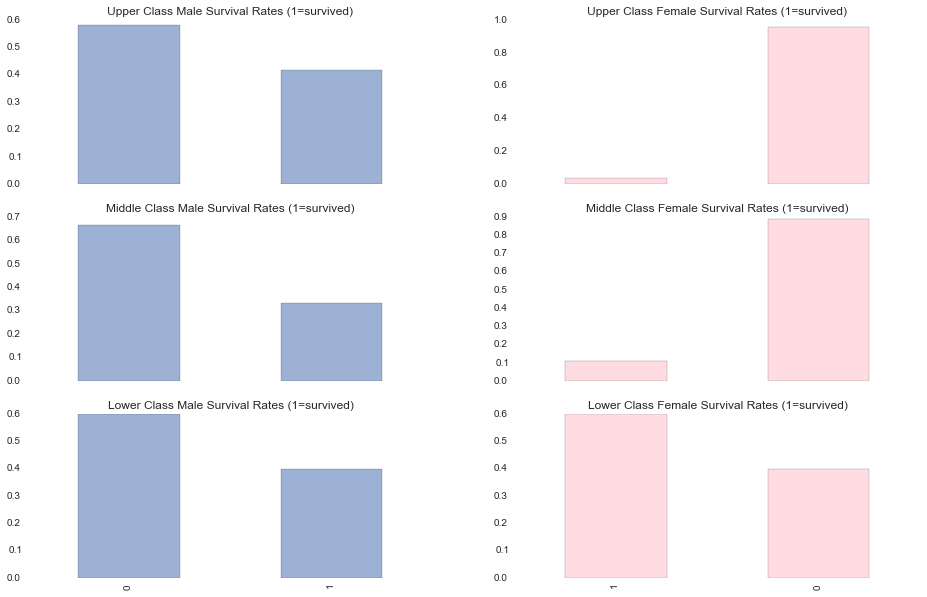

In [20]:
#make gender survival classes for all 3 classes
classGenderFigure = plt.figure(figsize=(16,10))

##Upper Class##
upperClassMaleAx = classGenderFigure.add_subplot(3,2,1)
upperClassMaleCount = len(upperClass[maleMask])
upperClassMPercentages = upperClass.Survived[maleMask].value_counts() / upperClassMaleCount
upperClassMPercentages.plot(kind='bar', alpha=alpha_barchart)
plt.title('Upper Class Male Survival Rates (1=survived)')


upperClassFemaleAx = classGenderFigure.add_subplot(3,2,2)
upperClassFemaleCount = len(upperClass[femaleMask])
upperClassFPercentages = upperClass.Survived[femaleMask].value_counts() / upperClassFemaleCount
upperClassFPercentages.sort()
upperClassFPercentages.plot(kind='bar', alpha=alpha_barchart, color='pink')
plt.title('Upper Class Female Survival Rates (1=survived)')


##Middle Class##
middleClassMaleAx = classGenderFigure.add_subplot(3,2,3)
middleClassMaleCount = len(middleClass[maleMask])
middleClassMPercentages = middleClass.Survived[maleMask].value_counts() / middleClassMaleCount
middleClassMPercentages.plot(kind='bar', alpha=alpha_barchart)
plt.title('Middle Class Male Survival Rates (1=survived)')

middleClassFemaleAx = classGenderFigure.add_subplot(3,2,4)
middleClassFemaleCount = len(middleClass[femaleMask])
middleClassFPercentages = middleClass.Survived[femaleMask].value_counts() / middleClassFemaleCount
middleClassFPercentages.sort(0)
middleClassFPercentages.plot(kind='bar', alpha=alpha_barchart, color='pink')
plt.title('Middle Class Female Survival Rates (1=survived)')

##Lower Class##
lowerClassMaleAx = classGenderFigure.add_subplot(3,2,5)
lowerClassMaleCount = len(lowerClass[maleMask])
lowerClassMPercentanges = lowerClass.Survived[maleMask].value_counts() / lowerClassMaleCount
lowerClassMPercentanges.plot(kind='bar', alpha=alpha_barchart)
plt.title('Lower Class Male Survival Rates (1=survived)')


lowerClassFemaleAx = classGenderFigure.add_subplot(3,2,6)
lowerClassFemaleCount = len(lowerClass[femaleMask])
lowerClassFPercentanges = lowerClass.Survived[femaleMask].value_counts() / lowerClassFemaleCount
lowerClassFPercentanges.sort(ascending=False)
lowerClassFPercentanges.plot(kind='bar', alpha=alpha_barchart, color='pink')
plt.title('Lower Class Female Survival Rates (1=survived)')



####Higher Dimensional Scatterplot Analysis

In [21]:
titanicTrainingAge = titanicTrainingDF.loc[: , 'Age']
titanicTrainingFare = titanicTrainingDF.loc[: ,'Fare']
titanicTrainingSurvived = titanicTrainingDF.loc[:, 'Survived']

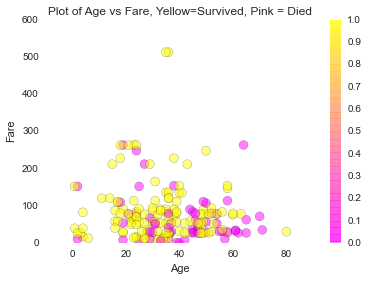

In [20]:
plt.scatter(titanicTrainingAge, titanicTrainingFare, c=titanicTrainingSurvived, s=80, cmap='spring', alpha=0.5)
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Fare')
plt.ylim(0,600)
plt.title('Plot of Age vs Fare, Yellow=Survived, Pink = Died')

###Identify Families/Traveling Groups and Analyze Survival Rates

In [22]:
ticketGrouping = titanicTrainingDF.groupby(titanicTrainingDF['Ticket'])
ticketGroupingSurvivalData = ticketGrouping['Survived'].agg([np.sum, len])
ticketGroupingSurvivalData['percentLived'] = ticketGroupingSurvivalData['sum'] / ticketGroupingSurvivalData['len']

In [23]:
ticketGroupingSurvivalGroupSizes = ticketGroupingSurvivalData.groupby('len')
ticketGroupingSurvivalGroupSizes.describe()

percentLived        sum
len                               
1   count     85.000000  85.000000
    mean       0.564706   0.564706
    std        0.498738   0.498738
    min        0.000000   0.000000
    25%        0.000000   0.000000
    50%        1.000000   1.000000
    75%        1.000000   1.000000
    max        1.000000   1.000000
2   count     30.000000  30.000000
    mean       0.766667   1.533333
    std        0.340723   0.681445
    min        0.000000   0.000000
    25%        0.500000   1.000000
    50%        1.000000   2.000000
    75%        1.000000   2.000000
    max        1.000000   2.000000
3   count     10.000000  10.000000
    mean       0.766667   2.300000
    std        0.224983   0.674949
    min        0.333333   1.000000
    25%        0.666667   2.000000
    50%        0.666667   2.000000
    75%        1.000000   3.000000
    max        1.000000   3.000000
4   count      2.000000   2.000000
    mean       0.750000   3.000000
    std        0.353553   1.414214
    min        0.500000   2.000000
    25%        0.625000   2.500000
    50%        0.750000   3.000000
    75%        0.875000   3.500000
    max        1.000000   4.000000

In [24]:
ticketGroupingSurvivalGroupSizesMean = ticketGroupingSurvivalGroupSizes['percentLived'].mean()

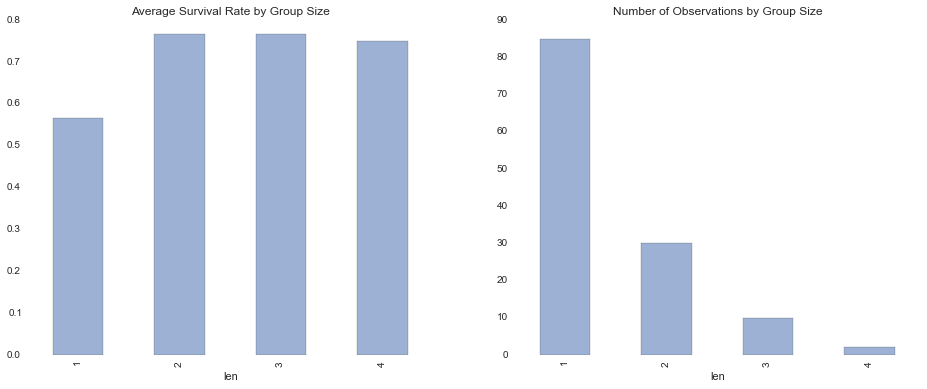

In [24]:
ticketGroupSurvivalFig = plt.figure(figsize=(16,6))
ticketGroupSurvivalAx1 = ticketGroupSurvivalFig.add_subplot(1,2,1)
ticketGroupingSurvivalGroupSizesMean.plot(kind='bar', alpha=alpha_barchart)
plt.title('Average Survival Rate by Group Size')
ticketGroupSurvivalAx2 = ticketGroupSurvivalFig.add_subplot(1,2,2)
ticketGroupingSurvivalGroupSizes['percentLived'].count().plot( kind='bar', alpha=alpha_barchart)
plt.title('Number of Observations by Group Size')


The only group sizes we can use are size one and two

##Machine Learning Analysis

###Unsupervised Learning

####Clustering with K-Means

###Supervised Learning

In [25]:
#Results dictionary to hold regression results
results = {}

####K-Nearest-Neighbors

In [26]:
from sklearn import neighbors

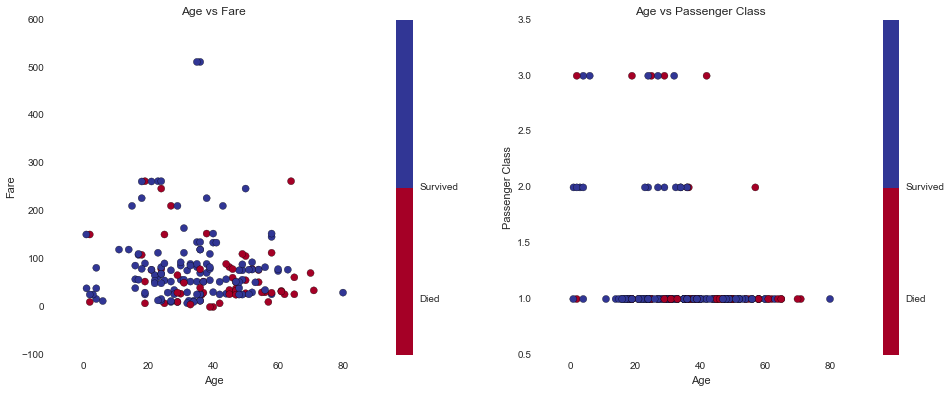

In [27]:
KNNFigure = plt.figure(figsize=(16,6))
targetNames = ['Died', 'Survived']
#formatter will label colorbor with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: targetNames[int(i)])
titanicTrainingPclass = titanicTrainingDF.loc[: , 'Pclass']
ax1 = KNNFigure.add_subplot(1,2,1)
plt.scatter(titanicTrainingAge, titanicTrainingFare, c=titanicTrainingSurvived, s=50, cmap=plt.cm.get_cmap('RdYlBu',2))
plt.colorbar(ticks=[0,1], format=formatter)
plt.clim(-0.5,2.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')

ax2 = KNNFigure.add_subplot(1,2,2)
plt.scatter(titanicTrainingAge, titanicTrainingPclass, c=titanicTrainingSurvived, s=50, cmap=plt.cm.get_cmap('RdYlBu',2))
plt.colorbar(ticks=[0,1], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel('Age')
plt.ylabel('Passenger Class')
plt.title('Age vs Passenger Class')

plt.show()

In [28]:
numNeighbors = 10
titanicKNN = neighbors.KNeighborsClassifier(n_neighbors=numNeighbors)
print('titanic training target values: ', titanicTrainingSurvived.shape)
print('titanic training x values:', titanicTrainingDF.shape)

titanic training target values:  (183,)
titanic training x values: (183, 12)


In [29]:
titanicTrainingKNNX = titanicTrainingDF.loc[: , ['Age','Fare']]

In [30]:
titanicKNN.fit(titanicTrainingKNNX, titanicTrainingSurvived)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=10, p=2, weights='uniform')

In [31]:
titanicTestingKNNX = titanicTestingDF.loc[: , ['Age','Fare']]
titanicTestingKNNX = titanicTestingKNNX.dropna()
print('shape of titanic testing data', titanicTestingKNNX.shape)
print('shape of titanic training data', titanicTrainingKNNX.shape)

shape of titanic testing data (331, 2)
shape of titanic training data (183, 2)


In [32]:
#Prediction Results
results['KNN'] = titanicKNN.predict(titanicTestingKNNX)

We definitely need to do some really good validation on this stuff

####Binary Logistic Regression
Will calculate the survival likelihood cutoff

In [33]:
#Model formula
logitRegFormula = 'Survived ~C(Pclass) + C(Sex) + Age + SibSp + C(Embarked) + Fare'

In [34]:
#Making our regression friendly dataframes
logitX = titanicTrainingDF.loc[:, ['Age', 'Pclass', 'Fare', 'Parch', 'SibSp','Sex']]
logitX = logitX.dropna()
logitX['Sex'] = logitX['Sex'].astype('category')
logitX = pd.get_dummies(logitX)

logitY = titanicTrainingDF.Survived

In [35]:
#Heres an alternative way to do it J!
from patsy import dmatrices
logitYDF, logitXDF = dmatrices(logitRegFormula, data=titanicTrainingDF, return_type='dataframe')

In [36]:
import statsmodels.api as sm
#Instantiate our logistic regression model
logitModel = sm.Logit(logitYDF, logitXDF)
logitResults = logitModel.fit()

Optimization terminated successfully.
         Current function value: 0.441770
         Iterations 7


In [37]:
logitResults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  183
Model:                          Logit   Df Residuals:                      174
Method:                           MLE   Df Model:                            8
Date:                Wed, 27 May 2015   Pseudo R-squ.:                  0.3017
Time:                        19:57:55   Log-Likelihood:                -80.844
converged:                       True   LL-Null:                       -115.78
                                        LLR p-value:                 5.227e-12
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            4.2431      0.892      4.755      0.000         2.494     5.992
C(Pclass)[T.2]      -0.0300      0.818     -0.037      0.971        -1.633     1.573
C(Pclass)[T.3]      -1.6730      0.958     -1.747      0.081        -3.550     0.204
C(Sex)[T.male]      -2.8507      0.495     -5.760      0.000        -3.821    -1.881
C(Embarked)[T.Q]    -1.6432      1.948     -0.844      0.399        -5.461     2.174
C(Embarked)[T.S]    -0.4240      0.441     -0.962      0.336        -1.288     0.440
Age                 -0.0356      0.014     -2.533      0.011        -0.063    -0.008
SibSp                0.1248      0.353      0.353      0.724        -0.568     0.817
Fare                 0.0001      0.003      0.040      0.968        -0.005     0.005
====================================================================================
"""

Lets visualize the logistic regression results

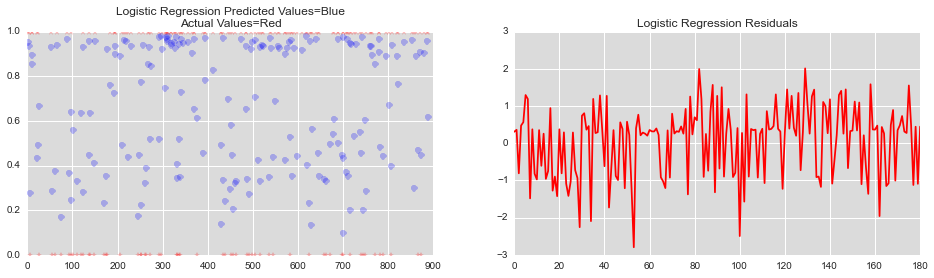

In [37]:
logitResultsFigure = plt.figure(figsize=(16,4))
logitResultsAx = logitResultsFigure.add_subplot(1,2,1,axisbg='#DBDBDB')
#generate predictions from logit model
survivalPredictions = logitResults.predict(logitXDF)
logitResultsAx.plot(logitXDF.index,survivalPredictions, 'bo', logitXDF.index, logitYDF, 'r*', alpha=.25)
plt.title('Logistic Regression Predicted Values=Blue \nActual Values=Red')

logitResultsResidualsAx = logitResultsFigure.add_subplot(1,2,2, axisbg='#DBDBDB')
logitResultsResidualsAx.plot(logitResults.resid_dev,'r-')
logitResultsResidualsAx.set_xlim(0,180)
plt.title('Logistic Regression Residuals')

Analyze logistic regression model predictions

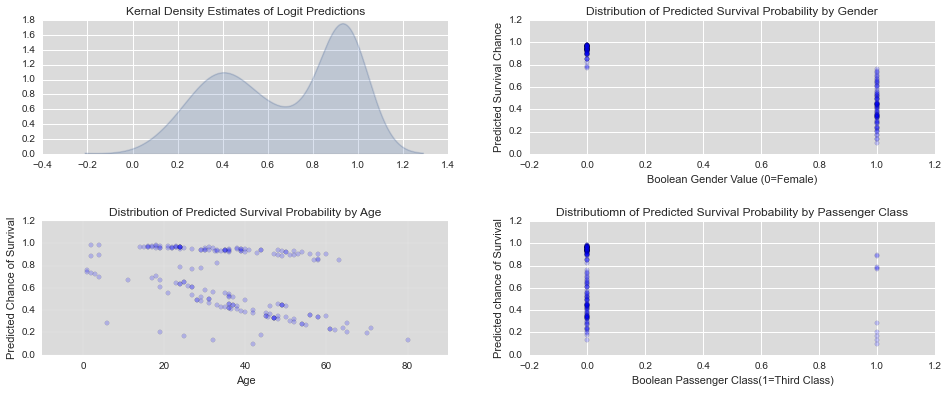

In [38]:
from statsmodels.nonparametric.kde import KDEUnivariate
logitPredictionsFigure = plt.figure(figsize=(16,6))
predictionsAlpha = 0.2

ax1 = logitPredictionsFigure.add_subplot(2,2,1, axisbg='#DBDBDB')
kde = KDEUnivariate(logitResults.predict())
kde.fit()
ax1.plot(kde.support, kde.density, alpha=predictionsAlpha)
ax1.fill_between(kde.support, kde.density, alpha=predictionsAlpha)
plt.title('Kernal Density Estimates of Logit Predictions')

ax2 = logitPredictionsFigure.add_subplot(2,2,2, axisbg='#DBDBDB')
ax2.scatter(y=logitResults.predict(), x=logitXDF['C(Sex)[T.male]'], alpha=predictionsAlpha)
plt.grid(b=True, which='major', axis='y')
plt.ylabel('Predicted Survival Chance')
plt.xlabel('Boolean Gender Value (0=Female)')
plt.title('Distribution of Predicted Survival Probability by Gender')

ax3 = logitPredictionsFigure.add_subplot(2,2,3, axisbg='#DBDBDB')
ax3.scatter(x=logitXDF['Age'],y=logitResults.predict(), alpha=predictionsAlpha)
plt.grid(True, linewidth=0.15)
plt.ylabel('Predicted Chance of Survival')
plt.xlabel('Age')
plt.title('Distribution of Predicted Survival Probability by Age')

ax4 = logitPredictionsFigure.add_subplot(2,2,4, axisbg='#DBDBDB')
ax4.scatter(x=logitXDF['C(Pclass)[T.3]'], y=logitResults.predict(), alpha=predictionsAlpha)
plt.grid(True, which='major', axis='y')
plt.xlabel('Boolean Passenger Class(1=Third Class)')
plt.ylabel('Predicted chance of Survival')
plt.title('Distributiomn of Predicted Survival Probability by Passenger Class')

logitPredictionsFigure.subplots_adjust(hspace=0.5, wspace=0.2)

In [40]:
#Kaggle leaves the lable val blank
titanicTestingDF['Survived'] = 100
logitTestingY, logitTestingX = dmatrices(logitRegFormula, data= titanicTestingDF, return_type='dataframe')
logitTestingResults = logitResults.predict(logitTestingX)
results['logit'] = logitTestingResults

####SVC for Fare and Age Features

In [39]:
from sklearn.svm import SVC

In [40]:
SVMX2 = titanicTrainingDF.loc[:, ['Age', 'Pclass', 'Fare', 'Parch', 'SibSp','Sex']]
SVMX = titanicTrainingDF.loc[:, ['Age', 'Fare']]
SVMY = titanicTrainingDF.Survived
SVMX2['Sex'] = SVMX2['Sex'].astype('category')
SVMX2 = pd.get_dummies(SVMX)

In [41]:
linearSVC = SVC(kernel='linear')
linearSVC.fit(SVMX, SVMY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

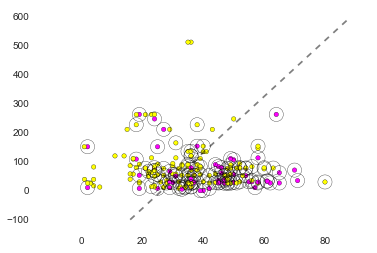

In [46]:
#Make convenience function to visualize what is happening (will plot SVM decision boundaries)
def plot_svc_decision_function(classifier, ax=None):
    "Plot the decision function for a 2D SVC"
    if ax is None:
        ax = plt.gca() #get current class instance on current figure matching given keyword args or create one
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y,x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = classifier.decision_function([xi, yj])
    #plot the margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--','-', '--'] )

plt.scatter(SVMX.loc[:, 'Age'], SVMX.loc[:, 'Fare'], c=SVMY, cmap='spring')
plot_svc_decision_function(linearSVC)
plt.scatter(linearSVC.support_vectors_[:, 0], linearSVC.support_vectors_[:, 1], s=200, facecolors='none')
plt.show()

In [44]:
SVMX

Age      Fare
1    38.0   71.2833
3    35.0   53.1000
6    54.0   51.8625
10    4.0   16.7000
11   58.0   26.5500
21   34.0   13.0000
23   28.0   35.5000
27   19.0  263.0000
52   49.0   76.7292
54   65.0   61.9792
62   45.0   83.4750
66   29.0   10.5000
75   25.0    7.6500
88   23.0  263.0000
92   46.0   61.1750
96   71.0   34.6542
97   23.0   63.3583
102  21.0   77.2875
110  47.0   52.0000
118  24.0  247.5208
123  32.5   13.0000
124  54.0   77.2875
136  19.0   26.2833
137  37.0   53.1000
139  24.0   79.2000
148  36.5   26.0000
151  22.0   66.6000
170  61.0   33.5000
174  56.0   30.6958
177  50.0   28.7125
..    ...       ...
737  35.0  512.3292
741  36.0   78.8500
742  21.0  262.3750
745  70.0   71.0000
748  19.0   53.1000
751   6.0   12.4750
759  33.0   86.5000
763  36.0  120.0000
765  51.0   77.9583
772  57.0   10.5000
779  43.0  211.3375
781  17.0   57.0000
782  29.0   30.0000
789  46.0   79.2000
796  49.0   25.9292
802  11.0  120.0000
806  39.0    0.0000
809  33.0   53.1000
820  52.0   93.5000
823  27.0   12.4750
835  39.0   83.1583
853  16.0   39.4000
857  51.0   26.5500
862  48.0   25.9292
867  31.0   50.4958
871  47.0   52.5542
872  33.0    5.0000
879  56.0   83.1583
887  19.0   30.0000
889  26.0   30.0000

[183 rows x 2 columns]

In [ ]:
polynomialSVC = SVC(kernel='poly')
polynomialSVC = polynomialSVC.fit(SVMX, SVMY)
radialSVC = SVC(kernel='rbf')
radialSVC = RadialSVC.fit(SVMX, SVMY)

NameError: name 'plot_svc_decision_function' is not defined

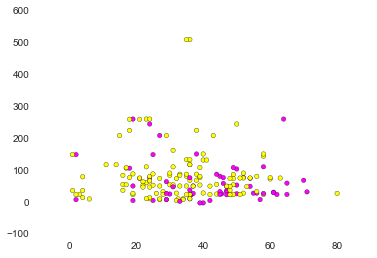

In [45]:
plt.scatter(SVMX.loc[:, 'Age'], SVMX.loc[:, 'Fare'], c=SVMY, cmap='spring')
plot_svc_decision_function(polynomialSVC)
plt.scatter(polynomialSVC.support_vectors_[:, 0], polynomialSVC.support_vectors_[:, 1], s=200, facecolors='none')

In [ ]:
pltt.scatter(SVMX.loc[:, 'Age'], SVMX.loc[:, 'Fare'], c=SVMY, cmap='spring')
plot_svc_decision_function(radialSVC)
plt.scatter(radialSVC.support_vectors_[:, 0], radialSVC.support_vectors[:, 1], s=200, facecolors='none')

####SVC for Passengerclass and Sex

In [ ]:
SVM2X = titanicTrainingData.loc[:, ['Sex', 'Pclass']]
SVM2Y = titanicTrainningData.Survived

#Create Kernel List for 3 differnet types
kernelList = ['linear', 'poly', 'rbf']

In [ ]:
#Set up plotting parameters and color map
svmFigure = plt.figure(figsize=(8,6))
colorMap = plt.cm.RdBu_r

In [ ]:
# Fit model
for figureNumber, kernel in enumerate(kernelList):
    classifier = svm.SVC(kernel=kernel, gamma=3) #gamma is internal SVM parameter, (1/n is default)
    classifier.fit(SVM2X, SVM2Y)
    
    plt.figure(figureNumber)
    #Z-order is which one is on top
    plt.scatter(SVM2X.Sex, SVM2X.Pclass, c=SVM2Y, zorder=10, cmap=colorMap)
    
    #Circle out the test data
    
    plt.axis('tight')
    x_min = SVM2X[:, ['Sex']].min()
    x_max = SVM2X[:, ['Sex']].max()
    y_min = modelX[:, ['Pclass']].min()
    y_max = modelX[:, ['Pclass']].max()
    
    #meshgrids!
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = classifier.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    #put results into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=colorMap)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--','-','--'], levels=[-5,0,.5])
    plt.title(kernel)
    plt.show()

####Random Forest

In [ ]:
#Import ensemble library from sklean
import sklearn.ensemble as ske
from fig_code import visualize_tree, plot_tree_interactive

#make random forst model and fit model to the training data
randomForestFormula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)'

randomForestY, randomForestX = dmatrices(randomForestFormula, data=titanicTrainingDF, return_type='dataframe')

In [ ]:
randomForestX.describe()

In [ ]:
print('shape of randomForestX', randomForestX.shape)
print('shape of randomForestY', randomForestY.shape)

In [ ]:
rfClassifier = ske.randomForestClassifier(n_estimators=100)

In [ ]:
visualize_tree(rfClassifier, randomForestX, randomForestY, boundaries=False)

In [ ]:
randomForestResults = rfClassifier.fit(X=randomForestX, y=randomForestY)

In [ ]:
#score results
randomForestScore = randomForestResults.score(randomForestX, randomForestY, random_state=0) 

In [ ]:
randomForestTestingY, randomForestTestingX = dmatrices(randomForestFormula, data= titanicTestingDF, return_type='dataframe')

results['random forest'] = rfClassifier.pedict(randomForestTestingX)

####Neural Net

###Cross-Validation and Model Selection

###Chaos Theory and Fractals